In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
path = '/kaggle/input/bank-customer-churn-prediction'
df = pd.read_csv(f"{path}/Churn_Modelling.csv")

In [3]:
df.columns = [col.lower() for col in df.columns]

In [4]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#dropping the columns that aren't of any use to us
df.drop(columns = ['rownumber', 'customerid', 'surname'], inplace = True)

In [6]:
#now we one hot encode geography and gender
def one_hot_encode(df, column):
    categorical_column = df[column]

    one_hot_encoded = pd.get_dummies(categorical_column, prefix=column) #this performs one hot encoding. It converts categorical variables to dummy/indicator variables.

    df = pd.concat([df, one_hot_encoded], axis=1) # Concatenate the one-hot encoded columns with the original DataFrame
    
    df = df.drop(column, axis=1) # Drop the original categorical column

    return df

In [7]:
cat = ['geography', 'gender']
df= one_hot_encode(df, cat)

In [8]:
df.head

<bound method NDFrame.head of       creditscore  age  tenure    balance  numofproducts  hascrcard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      isactivemember  estimatedsalary  exited  geography_France  \
0                  1        101348.88       1     

In [9]:
df.drop(columns = ['gender_Male', 'geography_Spain'], inplace = True) 

Dropped these columns as the information they conveyed could easily be conveyed by the other columns. For example, if a specific row has both geography_France and geography_Germany marked as false, it can easily be concluded that the country of residence of the person in question is spain. Similarly, if a row has gender_female marked as false, it can easily be concluded that the person in question is male.

In [10]:
df

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [11]:
#changing the categorical variables into numericals.
df["geography_France"] = df["geography_France"].astype(np.int64)
df["geography_Germany"] = df["geography_Germany"].astype(np.int64)
df["gender_Female"] = df["gender_Female"].astype(np.int64)

df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
df.tail()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,gender_Female
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0
9999,792,28,4,130142.79,1,1,0,38190.78,0,1,0,1


In [13]:
y = df['exited']

In [14]:
df.drop(columns = ['exited'], inplace = True) #dropped this column as it was unneeded.

In [15]:
df

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_France,geography_Germany,gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0


In [17]:
x=df

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
  
model.fit(x_train_scaled, y_train)
  
# Calculate the accuracy of the model
print(model.score(x_test_scaled, y_test))

0.83


In [28]:
y_pred=model.predict(x_test_scaled)

from sklearn.metrics import accuracy_score, classification_report

y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test, y_pred)

In [29]:
print(f" Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

 Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.66      0.27      0.39       393

    accuracy                           0.83      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.81      0.83      0.80      2000



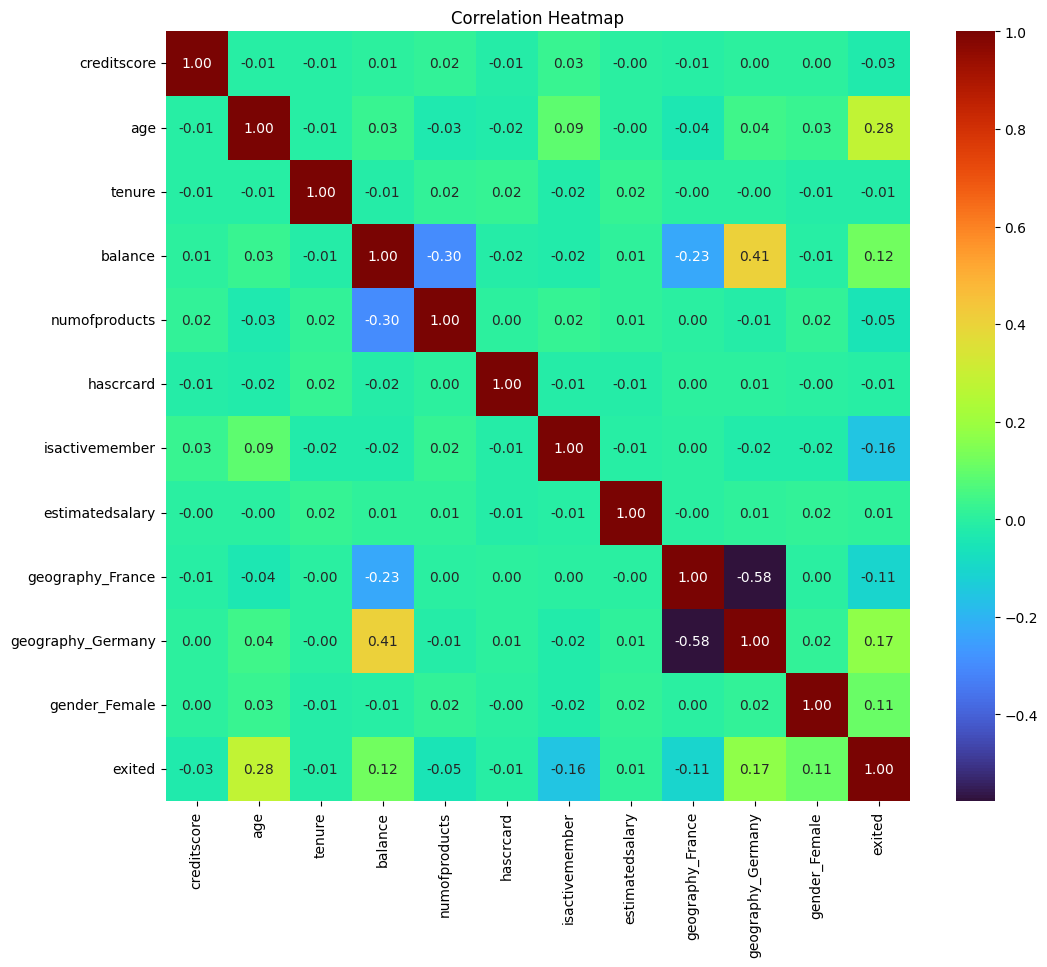

In [49]:
#now we focus on the correlation analysis
correlation_data=pd.concat([x_train,y_train],axis=1)
correlation_matrix=correlation_data.corr()

# Plotting a heat map of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='turbo', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Calculating correlation features and churn
churn_correlations=correlation_matrix['exited'].drop('exited')
churn_correlations=churn_correlations.sort_values(ascending=False)

print('Correlations with Churn:')
print(churn_correlations)

Correlations with Churn:
age                  0.283173
geography_Germany    0.169537
balance              0.118418
gender_Female        0.106478
estimatedsalary      0.010889
hascrcard           -0.006471
tenure              -0.013352
creditscore         -0.029307
numofproducts       -0.051009
geography_France    -0.106274
isactivemember      -0.156560
Name: exited, dtype: float64
